In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import random

In [2]:
# 读取并处理中债国债收益率曲线数据，由于40及50年期限国债到期收益率从2009年11月30日之前数据缺失，所以分开处理
# 分开后的数据整体完整，去掉NA数据并不影响分析结果
national_debt = pd.read_excel('中债国债收益率曲线.xls', parse_dates=True)
national_debt = national_debt.iloc[1:4664,:]
national_debt_s = national_debt.iloc[:,:national_debt.shape[1]-2].dropna()
national_debt_l = national_debt.iloc[:,national_debt.shape[1]-2:].dropna()

In [3]:
data = national_debt_s.iloc[:,[0,16]]
data.head()

,指标名称,中债国债到期收益率:10年
1,2002-01-04 00:00:00,3.2096
2,2002-01-07 00:00:00,3.2003
3,2002-01-08 00:00:00,3.5225
4,2002-01-09 00:00:00,3.5896
5,2002-01-10 00:00:00,3.5784


In [4]:
from fbprophet import Prophet

In [5]:
data.columns = ['ds', 'y']

In [6]:
data.y = data.y.astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
n = len(data) * 80 // 100
train_data = data.iloc[:n,]
test_data = data.iloc[n:,]

In [8]:
len(data) - n

933

In [9]:
model0 = Prophet(changepoint_prior_scale = 0.1, daily_seasonality=True)
model0.fit(train_data)
model1 = Prophet(changepoint_prior_scale = 0.3, daily_seasonality=True)
model1.fit(train_data)
model2 = Prophet(changepoint_prior_scale = 0.5, daily_seasonality=True)
model2.fit(train_data)
model3 = Prophet(changepoint_prior_scale = 0.05, daily_seasonality=True)
model3.fit(train_data)
model4 = Prophet(changepoint_prior_scale = 0.01, daily_seasonality=True)
model4.fit(train_data)

In [10]:
future0 = model0.make_future_dataframe(periods=933)
future1 = model1.make_future_dataframe(periods=933)
future2 = model2.make_future_dataframe(periods=933)
future3 = model3.make_future_dataframe(periods=933)
future4 = model4.make_future_dataframe(periods=933)

In [11]:
forecast0 = model0.predict(future0)
forecast1 = model1.predict(future1)
forecast2 = model2.predict(future2)
forecast3 = model3.predict(future3)
forecast4 = model4.predict(future4)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

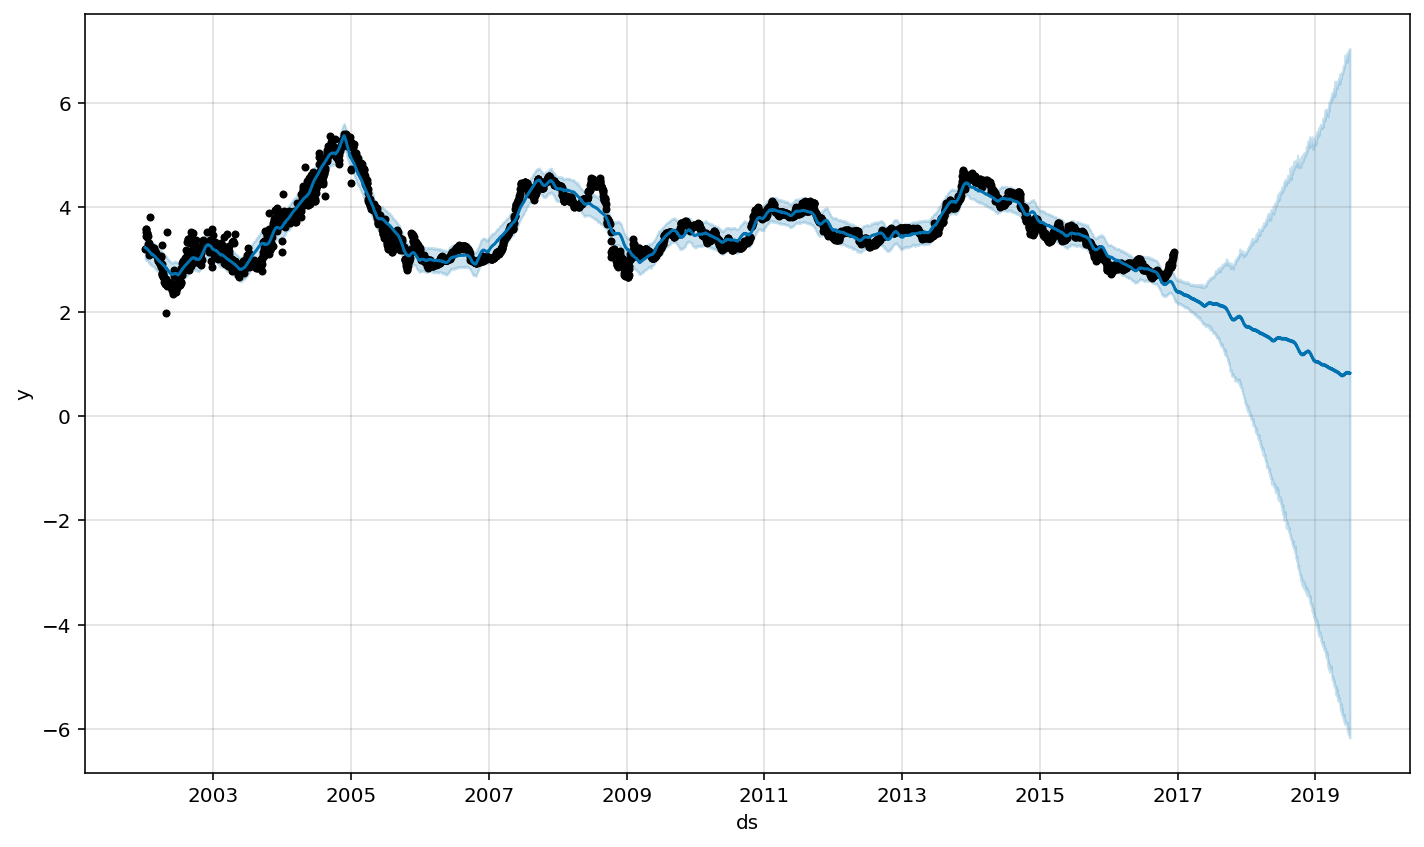

In [12]:
fig0 = model0.plot(forecast0)

In [13]:
#fig1 = model1.plot(forecast1)

In [14]:
#fig2 = model2.plot(forecast2)

In [15]:
#fig00 = model0.plot_components(forecast0)

In [16]:
#fig11 = model1.plot_components(forecast1)

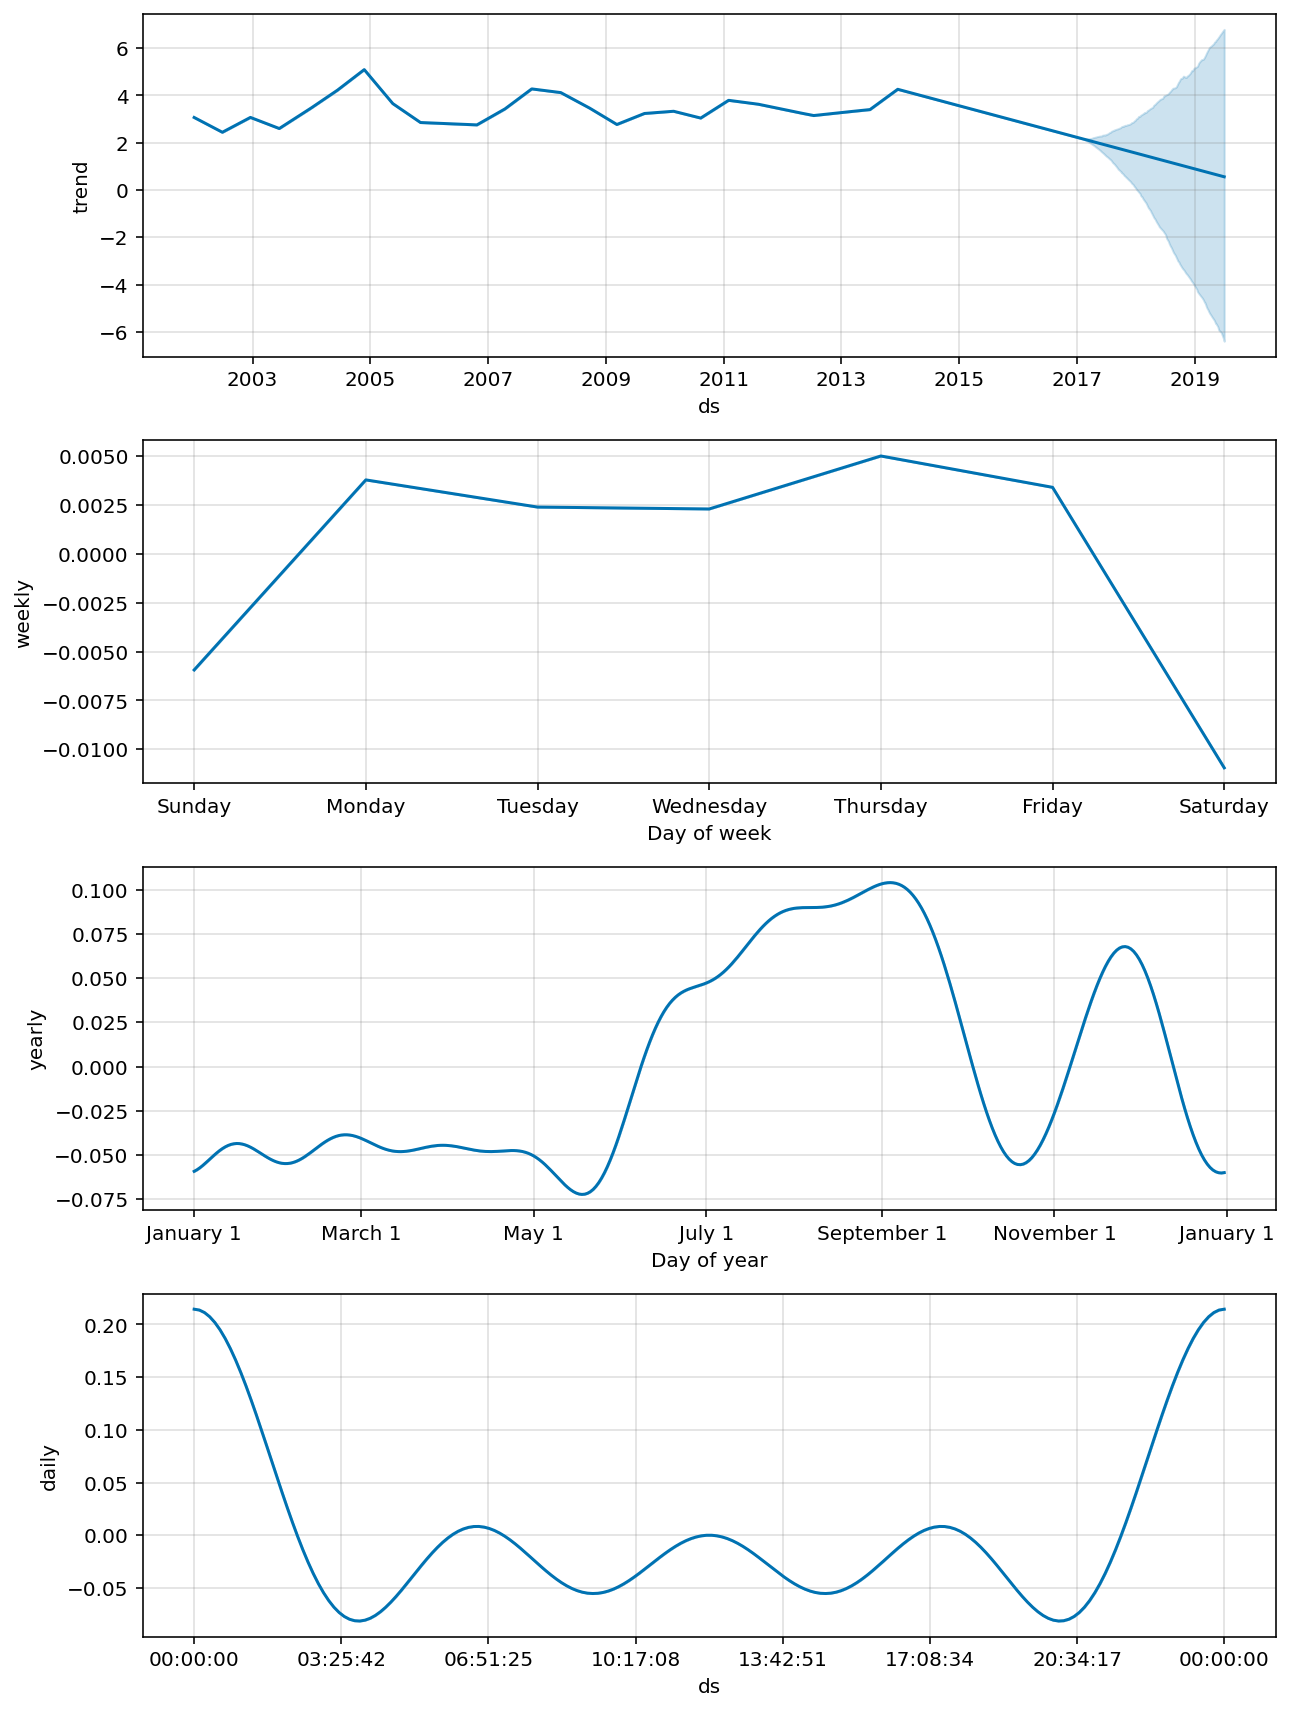

In [17]:
fig00 = model0.plot_components(forecast0)

In [18]:
#from fbprophet.plot import plot_plotly, plot_components_plotly
#plot_plotly(model, forecast)

In [19]:
#plot_components_plotly(model, forecast)

In [20]:
from sklearn.metrics import mean_squared_error
mse00 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast0.yhat[:n].apply(lambda x: (x - np.min(forecast0.yhat[:n])) / (np.max(forecast0.yhat[:n]) - np.min(forecast0.yhat[:n]))))
mse01 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast0.yhat[n:].apply(lambda x: (x - np.min(forecast0.yhat[n:])) / (np.max(forecast0.yhat[n:]) - np.min(forecast0.yhat[n:]))))
mse10 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast1.yhat[:n].apply(lambda x: (x - np.min(forecast1.yhat[:n])) / (np.max(forecast1.yhat[:n]) - np.min(forecast1.yhat[:n]))))
mse11 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast1.yhat[n:].apply(lambda x: (x - np.min(forecast1.yhat[n:])) / (np.max(forecast1.yhat[n:]) - np.min(forecast1.yhat[n:]))))
mse20 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast2.yhat[:n].apply(lambda x: (x - np.min(forecast2.yhat[:n])) / (np.max(forecast2.yhat[:n]) - np.min(forecast2.yhat[:n]))))
mse21 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast2.yhat[n:].apply(lambda x: (x - np.min(forecast2.yhat[n:])) / (np.max(forecast2.yhat[n:]) - np.min(forecast2.yhat[n:]))))
mse30 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast3.yhat[:n].apply(lambda x: (x - np.min(forecast3.yhat[:n])) / (np.max(forecast3.yhat[:n]) - np.min(forecast3.yhat[:n]))))
mse31 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast3.yhat[n:].apply(lambda x: (x - np.min(forecast3.yhat[n:])) / (np.max(forecast3.yhat[n:]) - np.min(forecast3.yhat[n:]))))
mse40 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast4.yhat[:n].apply(lambda x: (x - np.min(forecast4.yhat[:n])) / (np.max(forecast4.yhat[:n]) - np.min(forecast4.yhat[:n]))))
mse41 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast4.yhat[n:].apply(lambda x: (x - np.min(forecast4.yhat[n:])) / (np.max(forecast4.yhat[n:]) - np.min(forecast4.yhat[n:]))))

In [35]:
df_changepoint =  pd.DataFrame({'changepoint_scale':[0.01, 0.05, 0.1, 0.3, 0.5],
                               'train_mse':[mse40.round(6),mse30.round(6),mse00.round(6),mse10.round(6),mse20.round(6)],
                               'test_mse':[mse41.round(6),mse31.round(6),mse01.round(6),mse11.round(6),mse21.round(6)]})
df_changepoint

,changepoint_scale,train_mse,test_mse
0,0.01,0.057772,0.031305
1,0.05,0.012229,0.039440
2,0.10,0.010917,0.042368
3,0.30,0.011031,0.044499
4,0.50,0.010844,0.046006


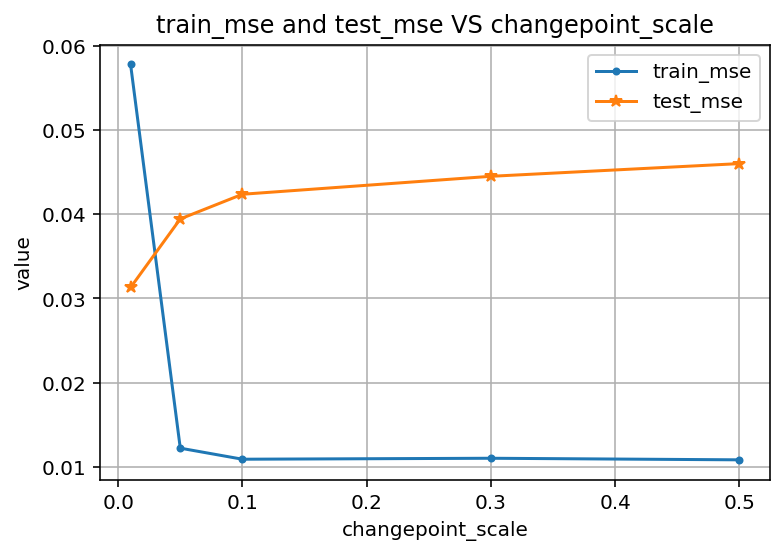

In [30]:
plt.plot(df_changepoint.changepoint_scale, df_changepoint.train_mse,  
         lw = 1.5, marker = '.', label = 'train_mse')
plt.plot(df_changepoint.changepoint_scale, df_changepoint.test_mse,  
         lw = 1.5, marker = '*', label = 'test_mse')
plt.grid(True)
plt.xlabel('changepoint_scale')
plt.ylabel('value')
plt.title('train_mse and test_mse VS changepoint_scale')
plt.legend()
plt.show()

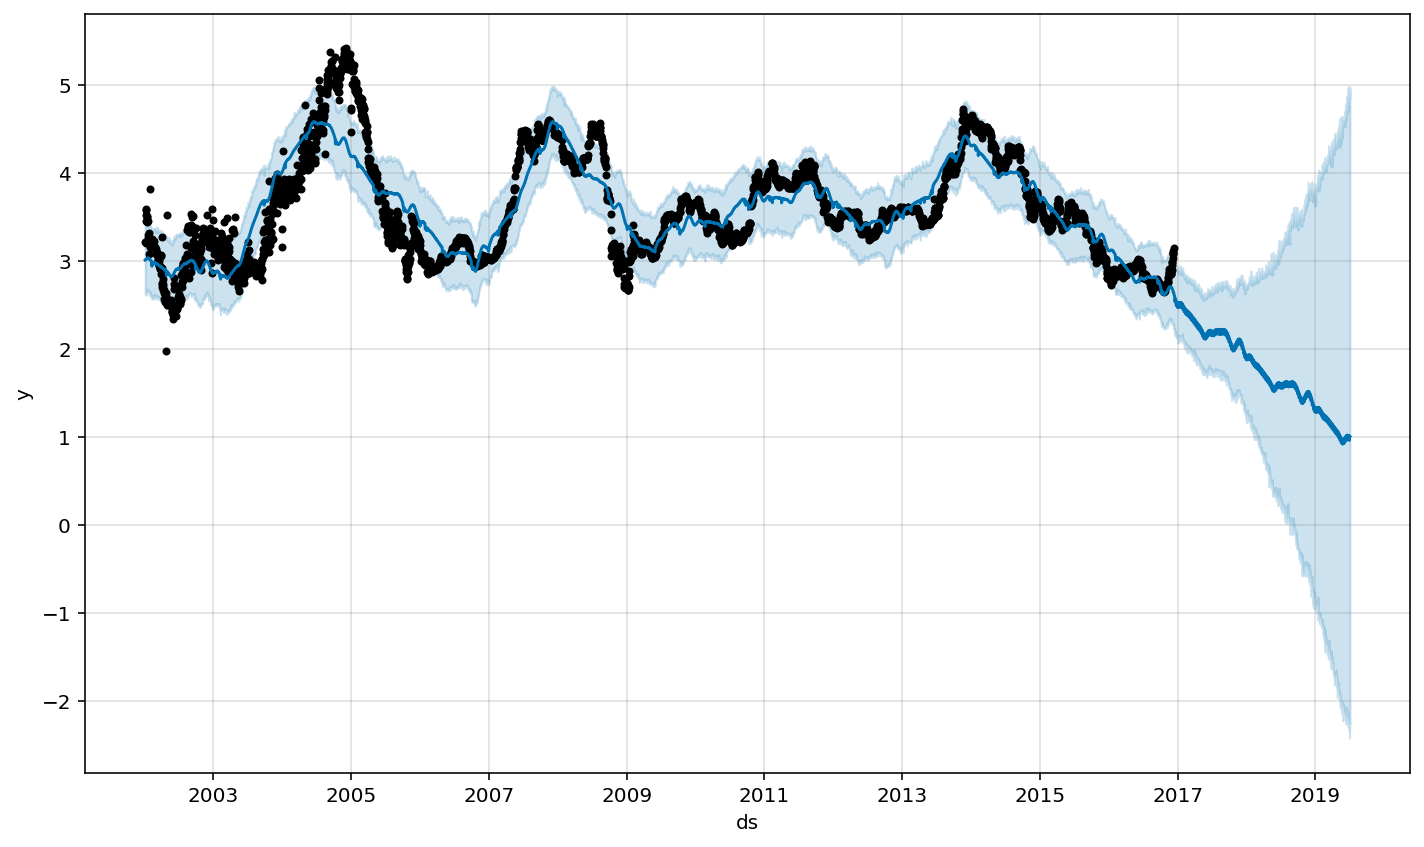

In [31]:
model5 = Prophet(n_changepoints = 10, daily_seasonality=True)
model5.fit(train_data)
model6 = Prophet(n_changepoints = 30, daily_seasonality=True)
model6.fit(train_data)
model7 = Prophet(n_changepoints = 50, daily_seasonality=True)
model7.fit(train_data)
model8 = Prophet(n_changepoints = 100, daily_seasonality=True)
model8.fit(train_data)
model9 = Prophet(n_changepoints = 200, daily_seasonality=True)
model9.fit(train_data)

future5 = model5.make_future_dataframe(periods=933)
future6 = model6.make_future_dataframe(periods=933)
future7 = model7.make_future_dataframe(periods=933)
future8 = model8.make_future_dataframe(periods=933)
future9 = model9.make_future_dataframe(periods=933)

forecast5 = model5.predict(future5)
forecast6 = model6.predict(future6)
forecast7 = model7.predict(future7)
forecast8 = model8.predict(future8)
forecast9 = model9.predict(future9)

fig5 = model5.plot(forecast5)

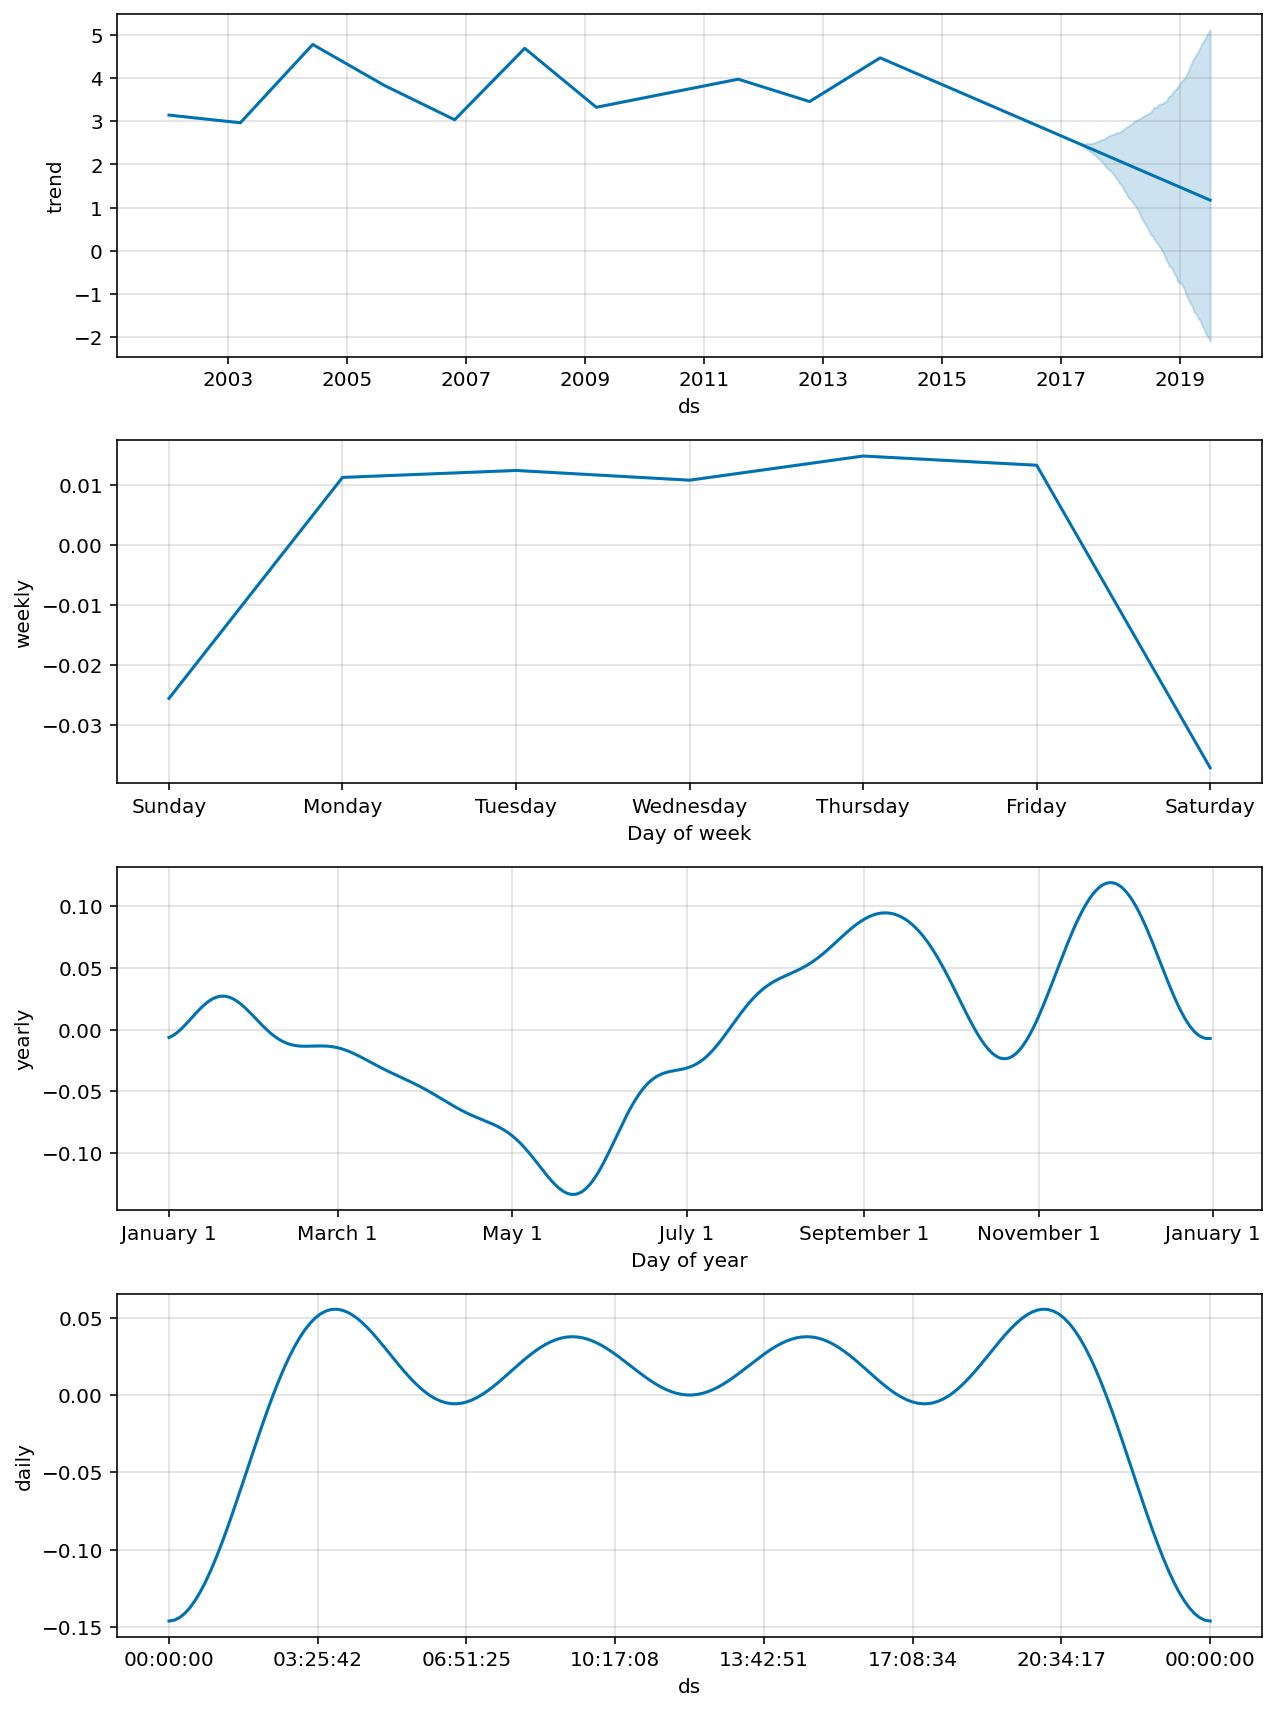

In [32]:
fig55 = model5.plot_components(forecast5)

In [33]:
mse50 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast5.yhat[:n].apply(lambda x: (x - np.min(forecast5.yhat[:n])) / (np.max(forecast5.yhat[:n]) - np.min(forecast5.yhat[:n]))))
mse51 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast5.yhat[n:].apply(lambda x: (x - np.min(forecast5.yhat[n:])) / (np.max(forecast5.yhat[n:]) - np.min(forecast5.yhat[n:]))))
mse60 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast6.yhat[:n].apply(lambda x: (x - np.min(forecast6.yhat[:n])) / (np.max(forecast6.yhat[:n]) - np.min(forecast6.yhat[:n]))))
mse61 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast6.yhat[n:].apply(lambda x: (x - np.min(forecast6.yhat[n:])) / (np.max(forecast6.yhat[n:]) - np.min(forecast6.yhat[n:]))))
mse70 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast7.yhat[:n].apply(lambda x: (x - np.min(forecast7.yhat[:n])) / (np.max(forecast7.yhat[:n]) - np.min(forecast7.yhat[:n]))))
mse71 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast7.yhat[n:].apply(lambda x: (x - np.min(forecast7.yhat[n:])) / (np.max(forecast7.yhat[n:]) - np.min(forecast7.yhat[n:]))))
mse80 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast8.yhat[:n].apply(lambda x: (x - np.min(forecast8.yhat[:n])) / (np.max(forecast8.yhat[:n]) - np.min(forecast8.yhat[:n]))))
mse81 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast8.yhat[n:].apply(lambda x: (x - np.min(forecast8.yhat[n:])) / (np.max(forecast8.yhat[n:]) - np.min(forecast8.yhat[n:]))))
mse90 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast9.yhat[:n].apply(lambda x: (x - np.min(forecast9.yhat[:n])) / (np.max(forecast9.yhat[:n]) - np.min(forecast9.yhat[:n]))))
mse91 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast9.yhat[n:].apply(lambda x: (x - np.min(forecast9.yhat[n:])) / (np.max(forecast9.yhat[n:]) - np.min(forecast9.yhat[n:]))))

In [36]:
df_point =  pd.DataFrame({'n_changepoints':[10, 30, 50, 100, 200],
                               'train_mse':[mse50.round(6),mse60.round(6),mse70.round(6),mse80.round(6),mse90.round(6)],
                               'test_mse':[mse51.round(6),mse61.round(6),mse71.round(6),mse81.round(6),mse91.round(6)]})
df_point

,n_changepoints,train_mse,test_mse
0,10,0.016586,0.036222
1,30,0.010360,0.038891
2,50,0.012528,0.038650
3,100,0.010842,0.039364
4,200,0.010775,0.039178


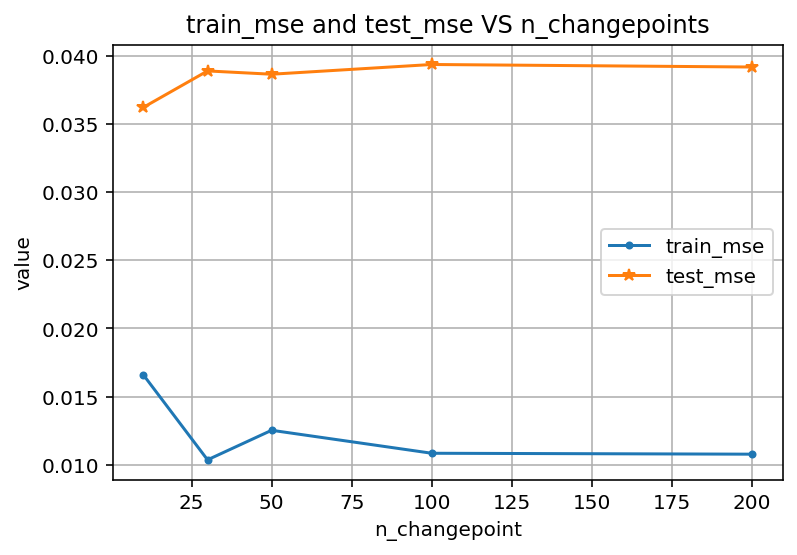

In [42]:
plt.plot(df_point.n_changepoints, df_point.train_mse,  
         lw = 1.5, marker = '.', label = 'train_mse')
plt.plot(df_point.n_changepoints, df_point.test_mse,  
         lw = 1.5, marker = '*', label = 'test_mse')
plt.grid(True)
plt.xlabel('n_changepoint')
plt.ylabel('value')
plt.title('train_mse and test_mse VS n_changepoints')
plt.legend()
plt.show()

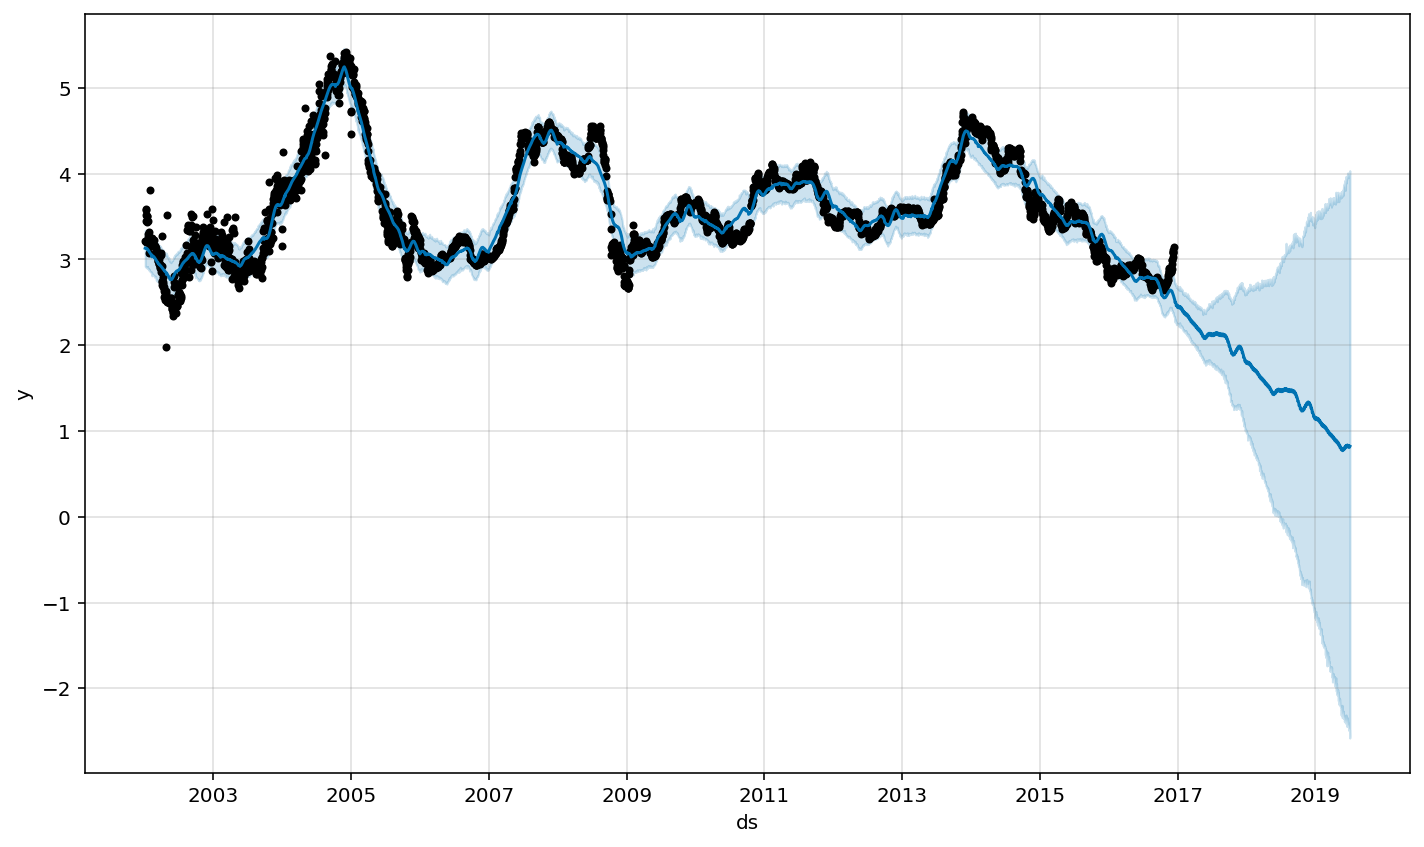

In [39]:
model10 = Prophet(changepoint_prior_scale = 0.05, n_changepoints = 100, 
                  daily_seasonality=True, growth = 'linear')
model10.fit(train_data)

future10 = model10.make_future_dataframe(periods=933)

forecast10 = model10.predict(future10)

fig10 = model10.plot(forecast10)

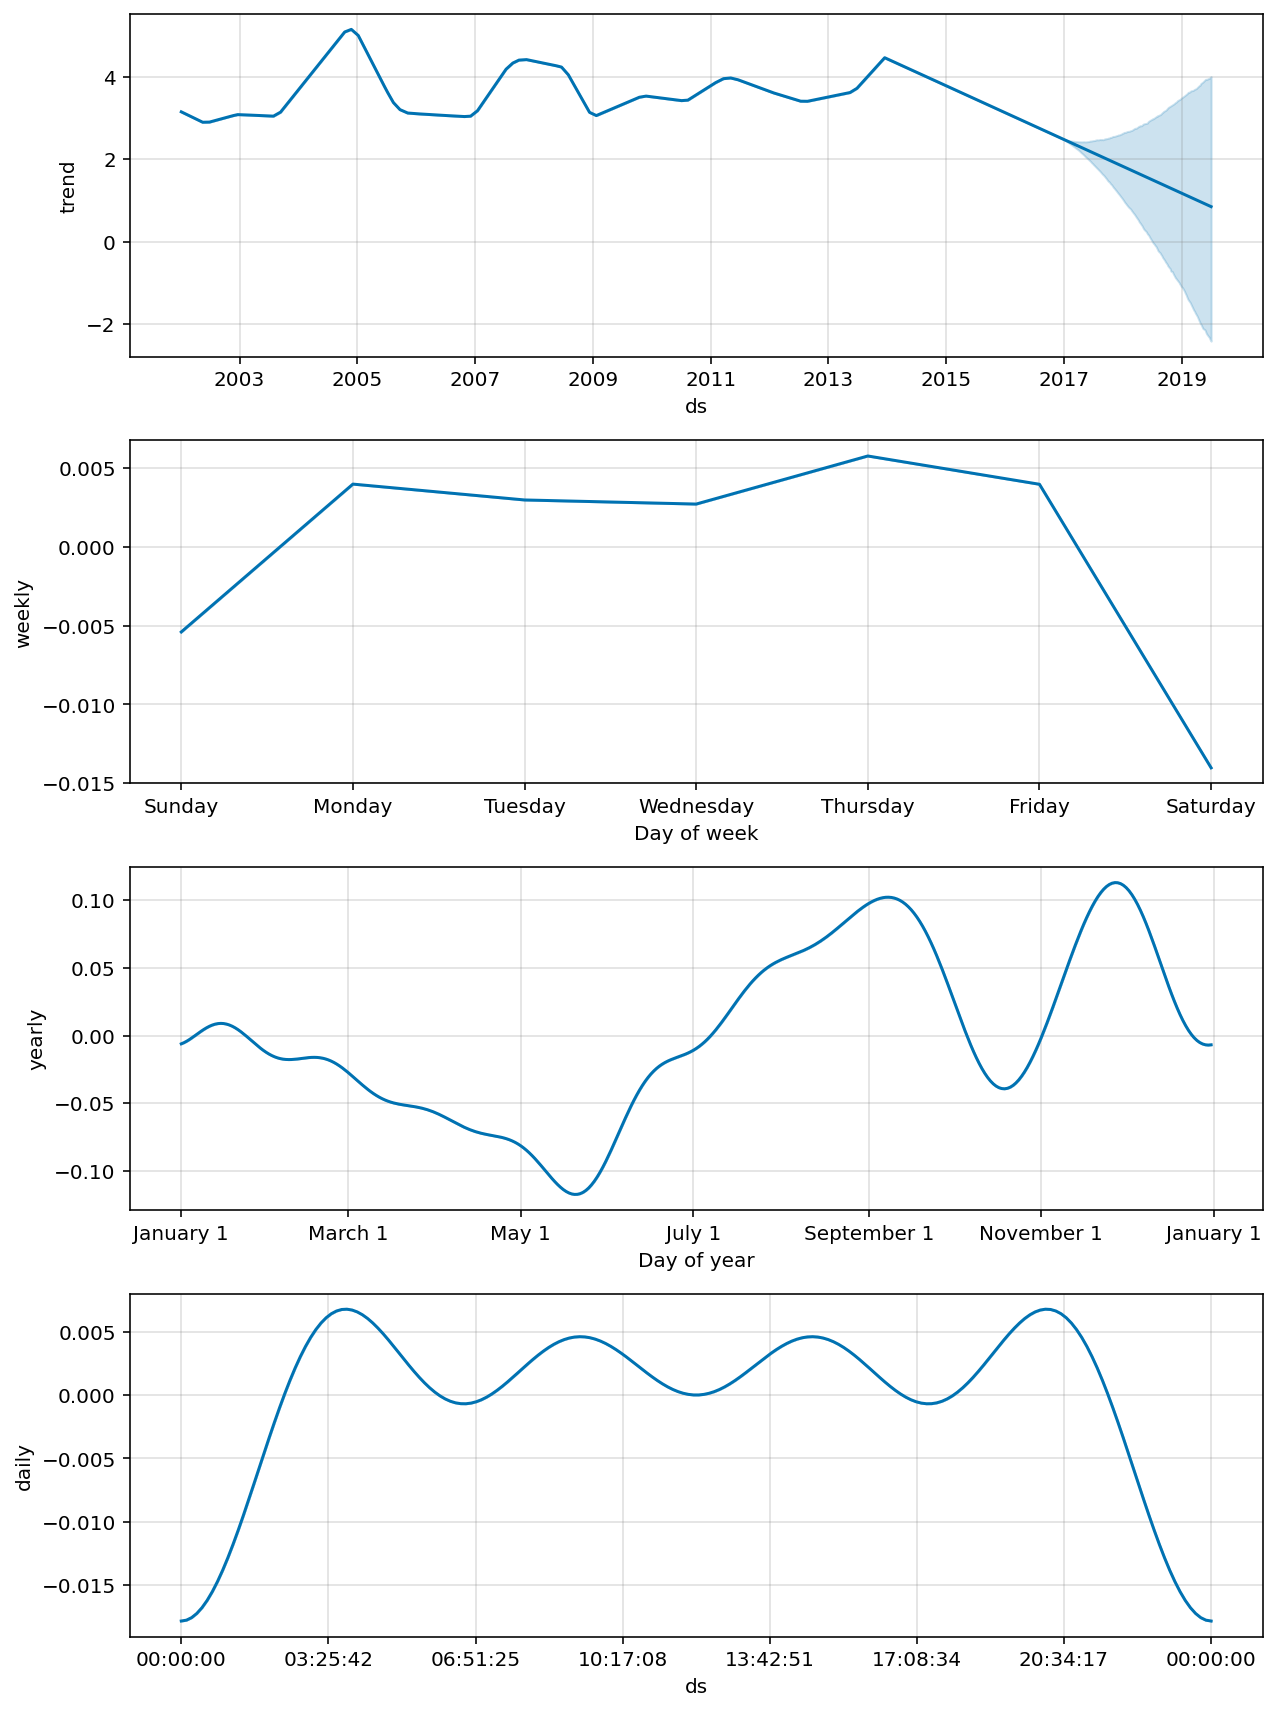

In [40]:
fig1010 = model10.plot_components(forecast10)

In [41]:
mse100 = mean_squared_error(train_data.y.apply(lambda x: (x - np.min(train_data.y)) / (np.max(train_data.y) - np.min(train_data.y))), 
                          forecast10.yhat[:n].apply(lambda x: (x - np.min(forecast10.yhat[:n])) / (np.max(forecast10.yhat[:n]) - np.min(forecast10.yhat[:n]))))
mse101 = mean_squared_error(test_data.y.apply(lambda x: (x - np.min(test_data.y)) / (np.max(test_data.y) - np.min(test_data.y))), 
                          forecast10.yhat[n:].apply(lambda x: (x - np.min(forecast10.yhat[n:])) / (np.max(forecast10.yhat[n:]) - np.min(forecast10.yhat[n:]))))
mse50.round(6), mse101.round(6)

(0.016586, 0.039364)